# Requirements

In [2]:
import pandas as pd

In [3]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [4]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC 

'gdown' is not recognized as an internal or external command,
operable program or batch file.


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [39]:
data =  pd.read_csv('climate-data.csv')

Explore the dataset using visualizations of your choice.

In [40]:
data.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [41]:
data.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [42]:
for column in data.columns:
    print(column, data[column].unique())

date ['2013-01-01' '2013-01-02' '2013-01-03' ... '2016-12-30' '2016-12-31'
 '2017-01-01']
meantemp [10.          7.4         7.16666667  8.66666667  6.          7.
  8.85714286 14.         11.         15.71428571 15.83333333 12.83333333
 14.71428571 13.83333333 16.5        12.5        11.28571429 11.2
  9.5        12.25       12.66666667 12.85714286 14.83333333 14.125
 16.2        16.         16.28571429 18.         17.42857143 16.625
 16.66666667 15.6        15.42857143 15.25       15.875      15.33333333
 17.33333333 19.16666667 14.42857143 13.66666667 15.85714286 17.71428571
 20.         20.5        16.85714286 16.875      17.85714286 20.8
 19.42857143 19.         19.33333333 17.6        20.875      20.85714286
 23.42857143 24.16666667 25.42857143 23.14285714 24.         23.5
 21.5        22.33333333 20.33333333 22.66666667 22.5        29.16666667
 23.83333333 25.25       27.375      27.         24.14285714 21.
 22.42857143 21.25       23.2        25.375      25.16666667 26.2
 24.6 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


<Axes: ylabel='Frequency'>

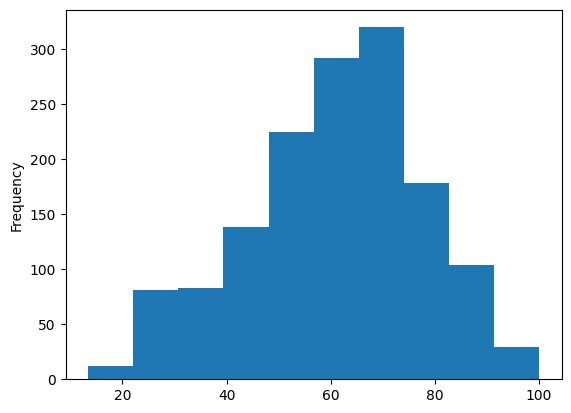

In [44]:
data['humidity'].plot(kind='hist', bins=10)

<Axes: ylabel='Frequency'>

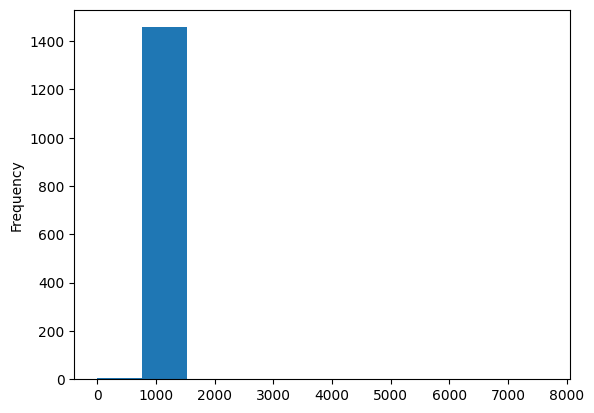

In [11]:
data['meanpressure'].plot(kind='hist', bins=10)

<Axes: ylabel='Frequency'>

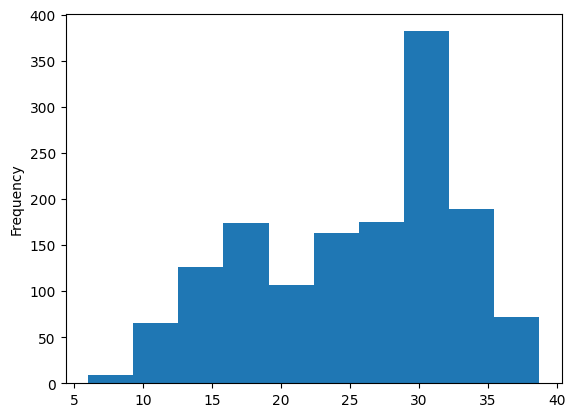

In [12]:
data['meantemp'].plot(kind='hist', bins=10)

<Axes: ylabel='Frequency'>

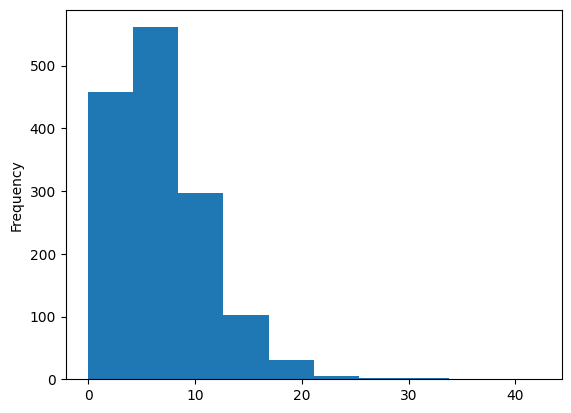

In [13]:
data['wind_speed'].plot(kind='hist', bins=10)

In [45]:
data = data.set_index('date')
data = data.sort_index()

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [46]:
columns = data.columns

In [47]:
lags = 3
for i in range(1, lags+1):
    for col in columns:
        data[f'{col}_prev_{i}'] = data[col].shift(i)

In [48]:
data = data.dropna(axis=0)

In [49]:
data

,meantemp,humidity,wind_speed,meanpressure,meantemp_prev_1,humidity_prev_1,wind_speed_prev_1,meanpressure_prev_1,meantemp_prev_2,humidity_prev_2,wind_speed_prev_2,meanpressure_prev_2,meantemp_prev_3,humidity_prev_3,wind_speed_prev_3,meanpressure_prev_3
date,,,,,,,,,,,,,,,,
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2013-01-06,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381,14.000000,94.300000,9.085000,1014.350000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [50]:
x, y = data.drop(columns=columns), data['meantemp']

In [51]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [52]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42)

model.fit(train_x, train_y)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

Use the trained model to make predictions for the test set.

In [53]:
predicitons = model.predict(test_x)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error:', mean_absolute_error(test_y, predicitons))
print('Mean Squared Error:', mean_squared_error(test_y, predicitons))
print('R2 Score:', r2_score(test_y, predicitons))

Mean Absolute Error: 1.3163932121205404
Mean Squared Error: 2.8414221811229297
R2 Score: 0.911292949503613


### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [55]:
from xgboost import XGBRegressor

model1 = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)

model1.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

Use the trained model to make predictions for the test set.

In [56]:
predicitons1 = model1.predict(test_x)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [57]:
print('Mean Absolute Error:', mean_absolute_error(test_y, predicitons1))
print('Mean Squared Error:', mean_squared_error(test_y, predicitons1))
print('R2 Score:', r2_score(test_y, predicitons1))

Mean Absolute Error: 1.6542436895810013
Mean Squared Error: 4.75330949852918
R2 Score: 0.851605274108071


# Laboratory Exercise - Bonus Task (+ 2 points)

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [58]:
import keras
from keras.models import Sequential
from keras.layers import Dense 

In [124]:
model3 = Sequential()

model3.add(Dense(32, activation='relu'))
model3.add(Dense(16, activation='sigmoid'))
model3.add(Dense(8, activation='sigmoid'))
model3.add(Dense(1, activation='linear'))

In [125]:
model3.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.R2Score(), keras.metrics.R2Score()])

In [126]:
history = model3.fit(train_x, train_y, epochs=10, batch_size=8, validation_split=0.2)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 685.8214 - r2_score: -11.5996 - r2_score_1: -11.5996 - val_loss: 505.3272 - val_r2_score: -11.1062 - val_r2_score_1: -11.1062
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 596.8107 - r2_score: -9.5068 - r2_score_1: -9.5068 - val_loss: 444.5606 - val_r2_score: -9.6504 - val_r2_score_1: -9.6504
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 538.5677 - r2_score: -8.2044 - r2_score_1: -8.2044 - val_loss: 398.2648 - val_r2_score: -8.5413 - val_r2_score_1: -8.5413
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 491.9376 - r2_score: -7.5741 - r2_score_1: -7.5741 - val_loss: 362.2238 - val_r2_score: -7.6779 - val_r2_score_1: -7.6779
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 439.3950 - r2_score: -6.4657 - r2_score_1: -6.4657 - val_loss: 331.5212 - val_r2_score: -6.9423 - val_r2_score_1: -6.9423
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 422.7560 - r2_score: -6.70

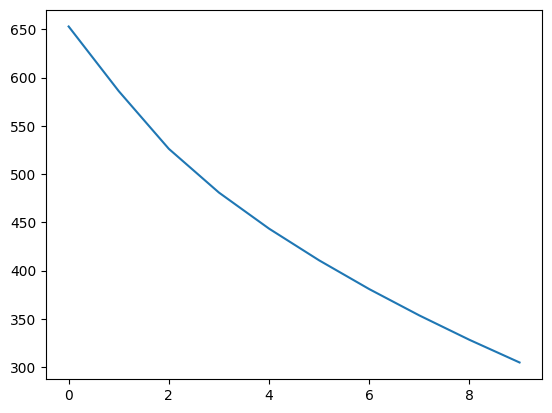

In [127]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [128]:
predictions2 = model3.predict(test_x)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [129]:
print('Mean Absolute Error:', mean_absolute_error(test_y, predictions2))
print('Mean Squared Error:', mean_squared_error(test_y, predictions2))
print('R2 Score:', r2_score(test_y, predictions2))

Mean Absolute Error: 19.60153390034286
Mean Squared Error: 416.2472627231205
R2 Score: -11.994924583424755
